In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
df=pd.read_csv('breast-cancer.csv')

In [66]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [68]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


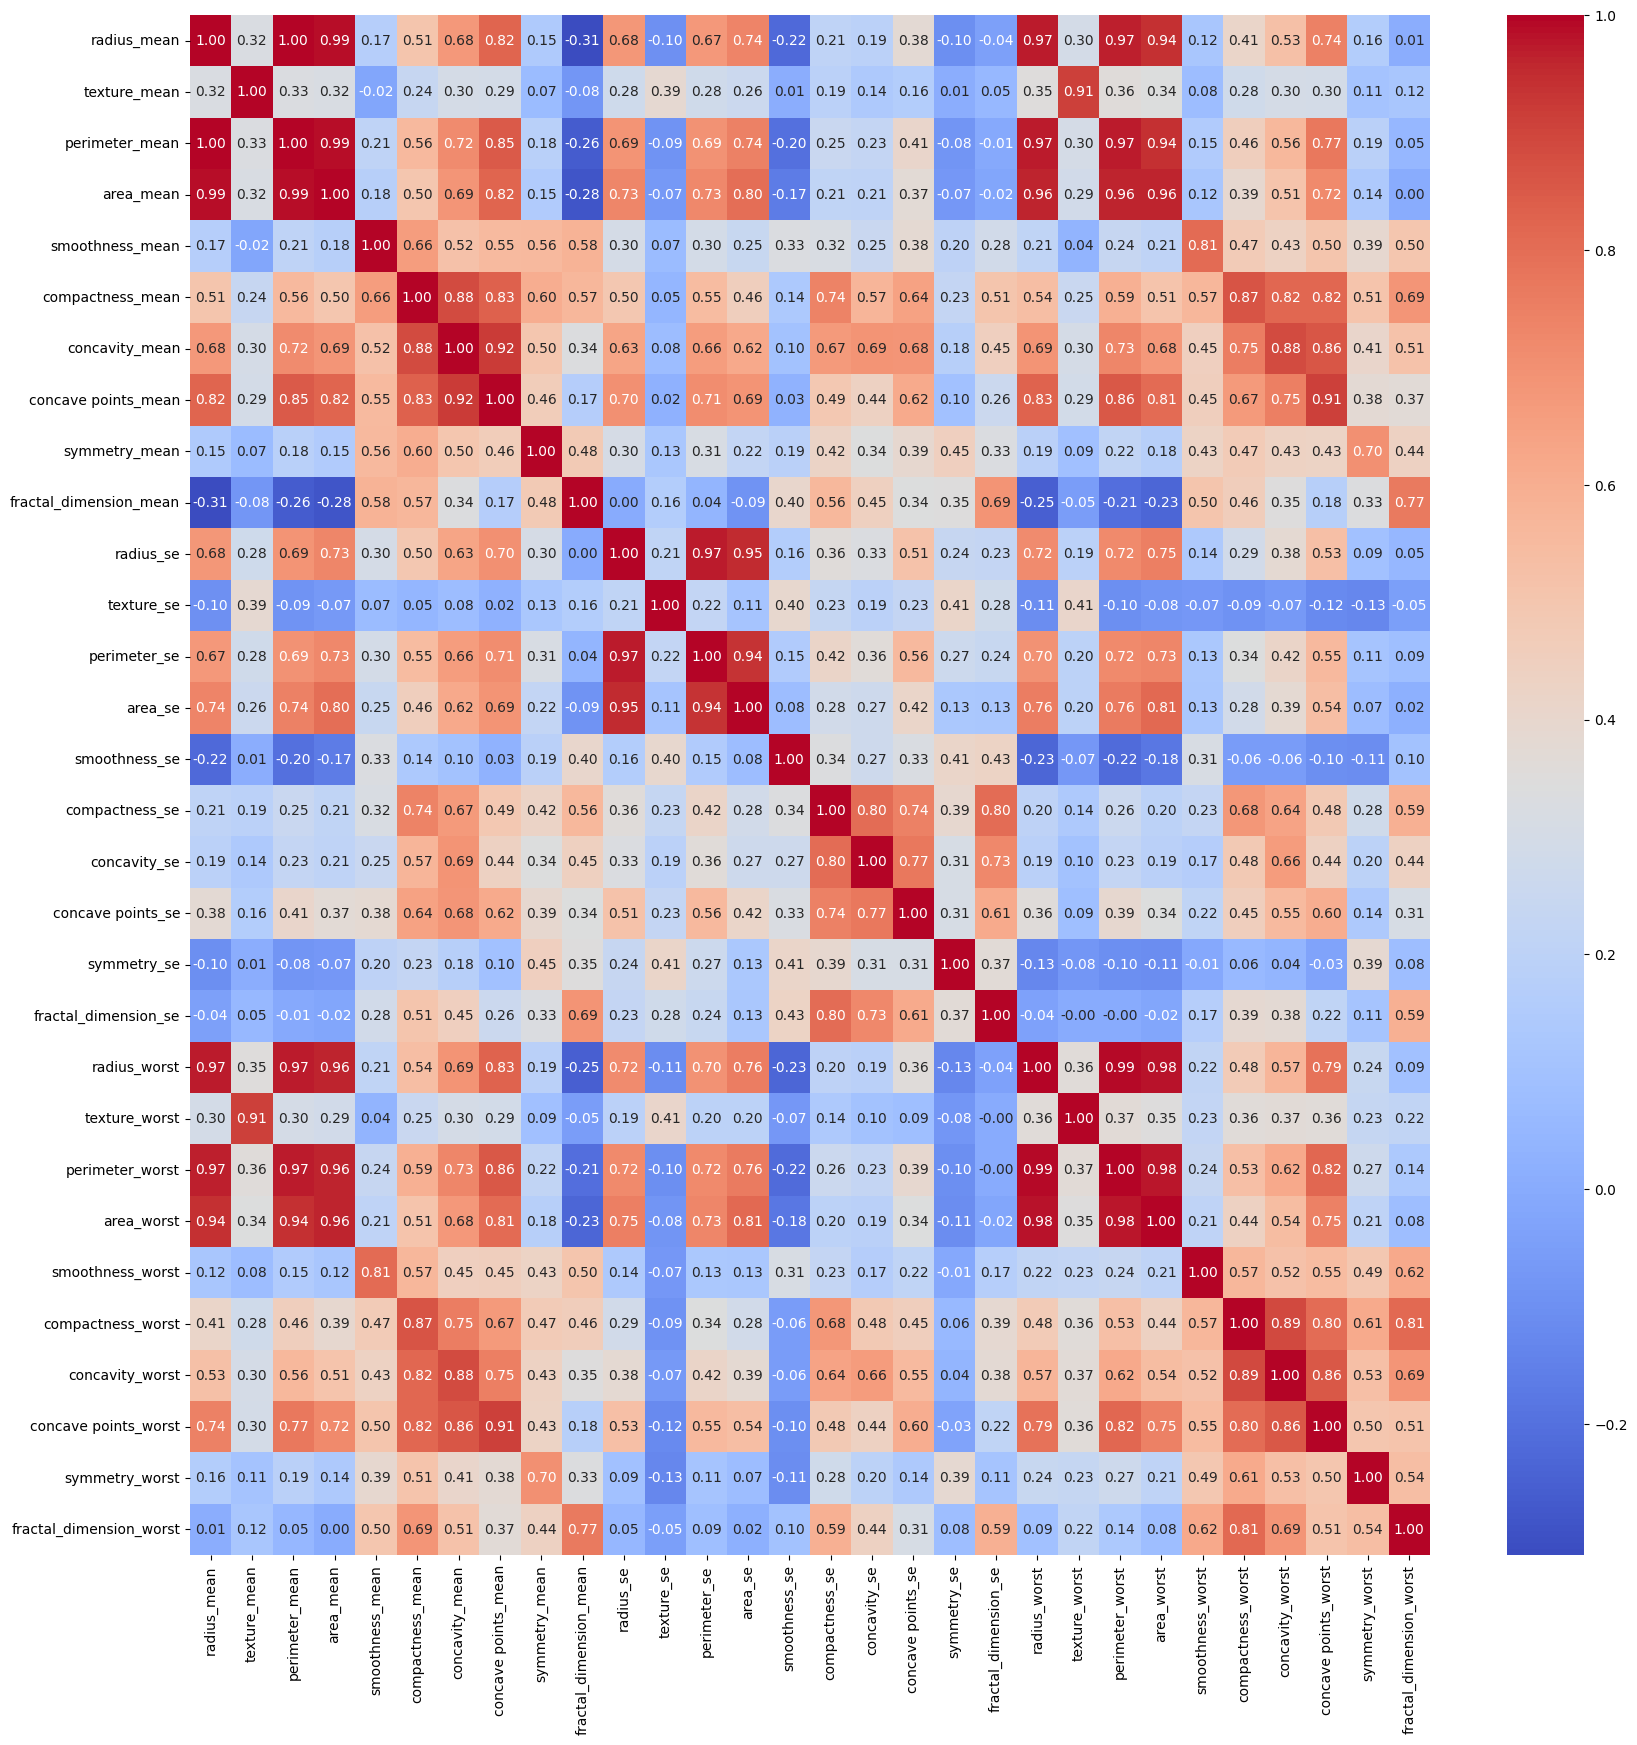

In [69]:
import seaborn as sns

# Dropping the 'id' and 'diagnosis' columns as they are not needed for the correlation matrix
df_corr = df.drop(columns=['id', 'diagnosis'])

# Computing the correlation matrix
corr_matrix = df_corr.corr()

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

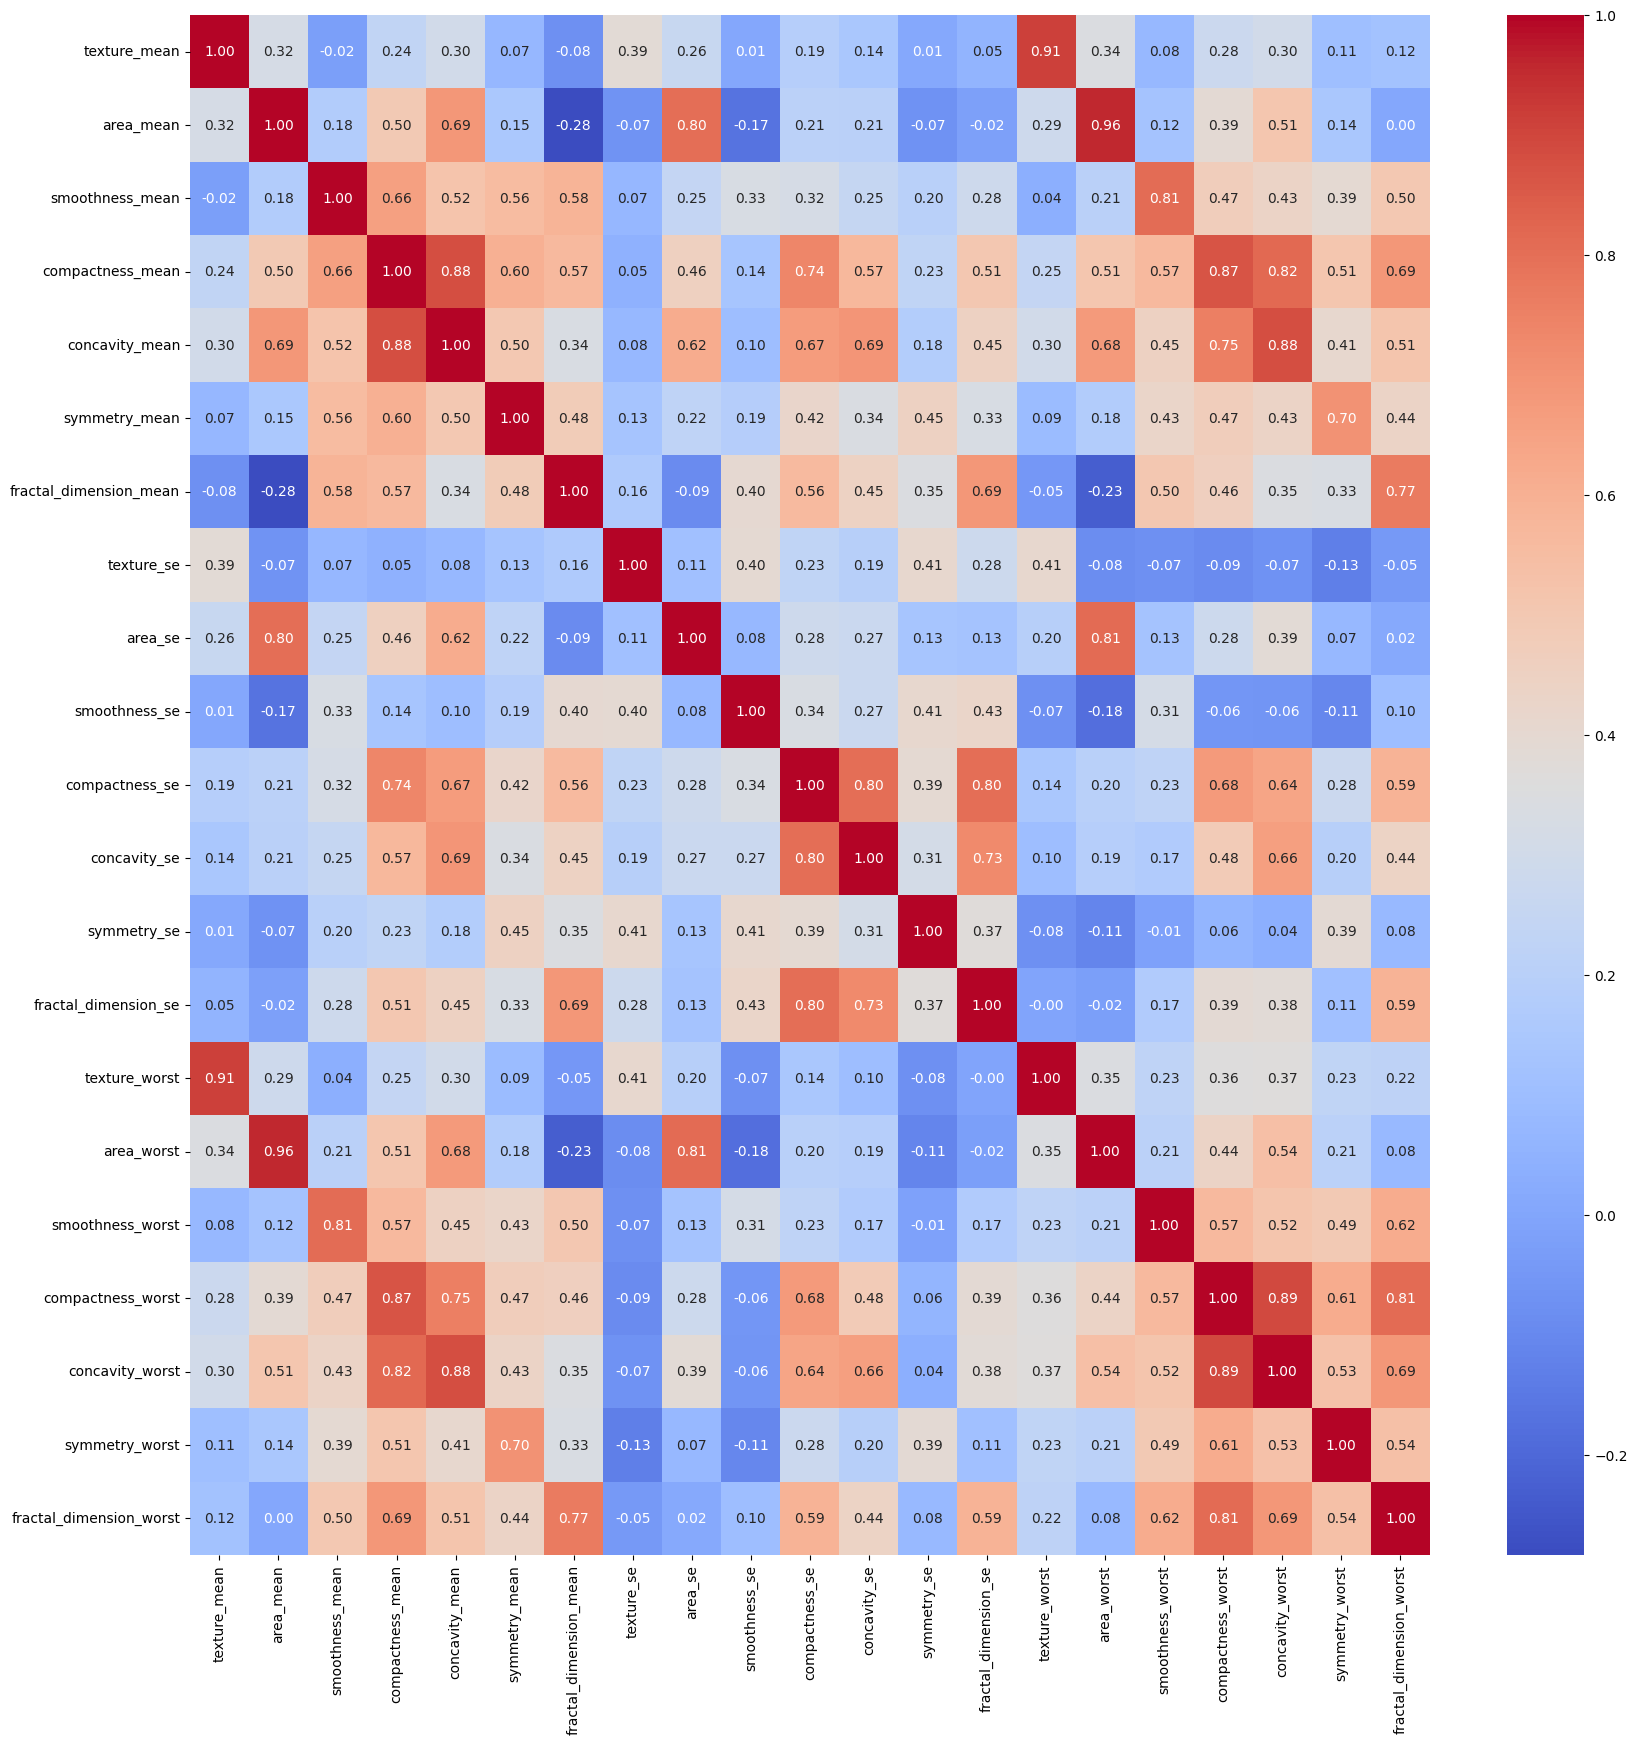

In [70]:
# Computing the correlation matrix
corr_matrix = df_corr.corr()
# Dropping the 'id' and 'diagnosis' columns as they are not needed for the correlation matrix
df_corr = df.drop(columns=['id', 'diagnosis','radius_mean','perimeter_mean','radius_worst','perimeter_worst','radius_se','perimeter_se','concave points_mean','concave points_worst','concave points_se'])

# Computing the correlation matrix
corr_matrix = df_corr.corr()

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [71]:
X=df.drop(labels=['id', 'diagnosis','radius_mean','perimeter_mean','radius_worst','perimeter_worst','radius_se','perimeter_se','concave points_mean','concave points_worst','concave points_se'],axis=1)
X.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,...,0.05373,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01860,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,...,0.03832,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05661,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,...,0.05688,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.2364,0.07678


<Axes: >

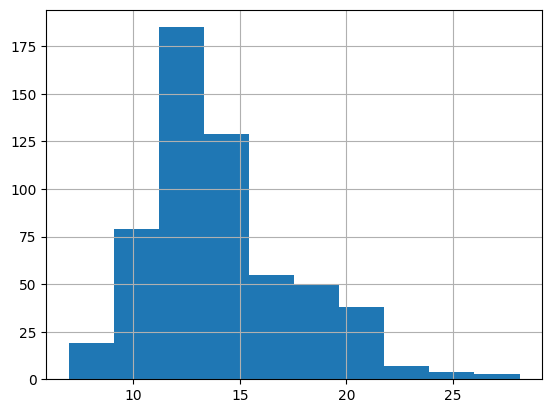

In [72]:
df['radius_mean'].hist()

<Axes: >

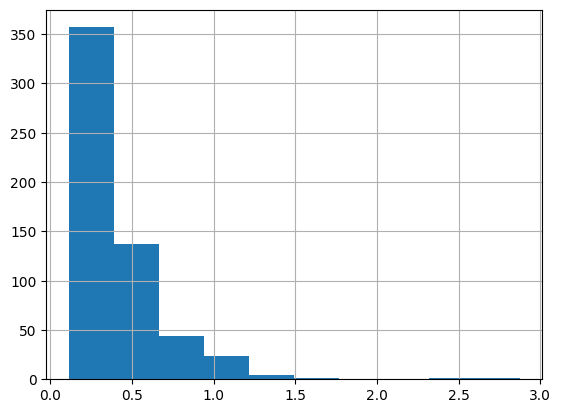

In [73]:
df['radius_se'].hist()

In [74]:
X.shape

(569, 21)

In [75]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(df['diagnosis'])

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [78]:
# Build the model
model = Sequential()

# Input layer 
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layers 
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.2)) 

# Output layer (since this is a binary classification)
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\retro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [80]:
# Training the model
history = model.fit(X_train, Y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, Y_test),
                    verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6448 - loss: 0.6492 - val_accuracy: 0.6667 - val_loss: 0.5657
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6469 - loss: 0.5628 - val_accuracy: 0.7807 - val_loss: 0.4707
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8069 - loss: 0.4554 - val_accuracy: 0.9211 - val_loss: 0.3655
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8406 - loss: 0.4049 - val_accuracy: 0.9386 - val_loss: 0.2808
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8707 - loss: 0.3284 - val_accuracy: 0.9474 - val_loss: 0.2164
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8937 - loss: 0.2997 - val_accuracy: 0.9649 - val_loss: 0.1744
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9147 - loss: 0.2568 - val_accuracy: 0.9649 - val_loss: 0.1505
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9266 - loss: 0.1945 - val_accuracy: 0.9737 - val_loss

In [81]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9737


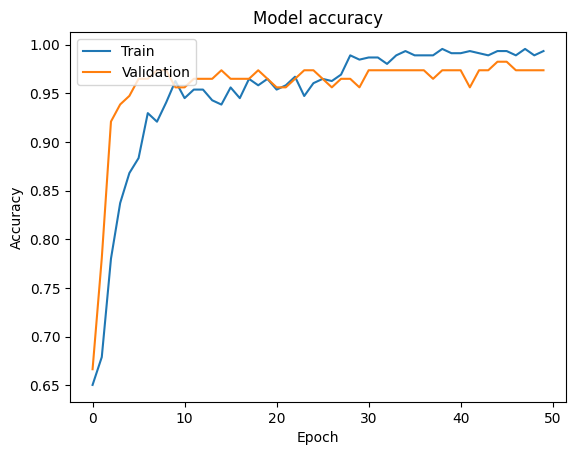

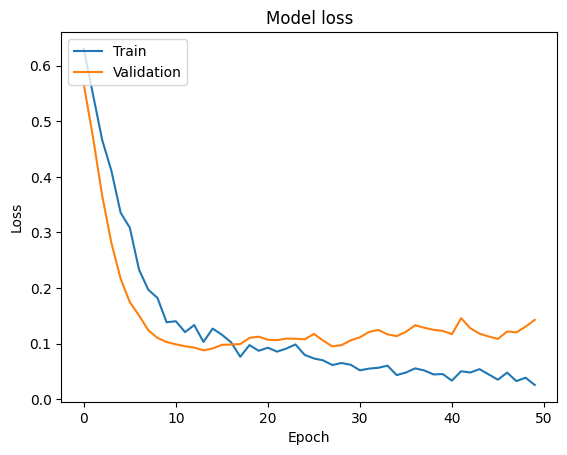

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [83]:
from tensorflow.keras.callbacks import EarlyStopping
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [84]:
history = model.fit(X_train, Y_train, 
                    epochs=50, 
                    batch_size=16, 
                    validation_data=(X_test, Y_test),
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9849 - loss: 0.0468 - val_accuracy: 0.9649 - val_loss: 0.1409
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0792 - val_accuracy: 0.9649 - val_loss: 0.1354
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0336 - val_accuracy: 0.9737 - val_loss: 0.1447
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.0652 - val_accuracy: 0.9737 - val_loss: 0.1607
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9926 - loss: 0.0264 - val_accuracy: 0.9649 - val_loss: 0.1870
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9952 - loss: 0.0330 - val_accuracy: 0.9737 - val_loss: 0.1492
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9915 - loss: 0.0418 - val_accuracy: 0.9825 - val_loss: 0.1321
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9943 - loss: 0.0419 - val_accuracy: 0.9649 - val_loss:

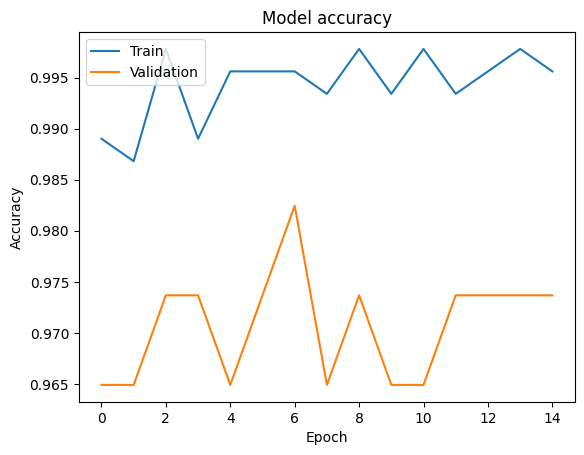

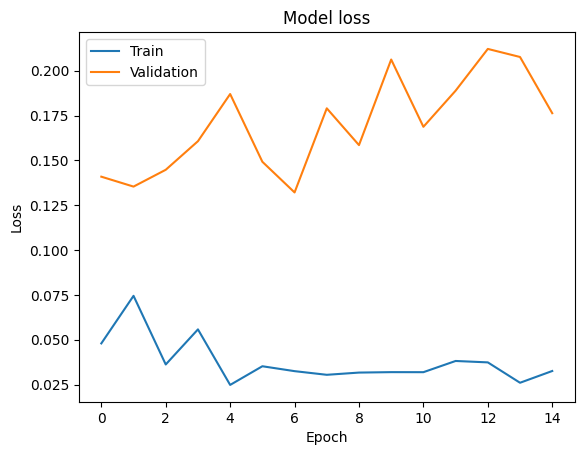

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [86]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 0.98


In [87]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)  # Converting probabilities to binary output

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001C38AC63BA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [88]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[70  1]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [94]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 32)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,301 (28.52 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,868 (19.02 KB)

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   texture_mean             569 non-null    float64
 1   area_mean                569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concavity_mean           569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   texture_se               569 non-null    float64
 8   area_se                  569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  compactness_se           569 non-null    float64
 11  concavity_se             569 non-null    float64
 12  symmetry_se              569 non-null    float64
 13  fractal_dimension_se     569 non-null    float64
 14  texture_worst            5

In [91]:
import pickle
pickle.dump(model,open('BCPnew.pkl','wb'))